<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Catboost Regression</h2>
</div>

### Table of contents : <br/>
1. Install xgboost
2. Importing libraries and dataset
3. EDA
3. Parameter description
4. Initialize catboost model
5. Model building
4. xgboost hyperparameter tuning

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing libraries and dataset</h2>
</div>

In [1]:
# pip install catboost

In [2]:
import pandas as pd # for data manupulation
import numpy as np # for numeric operation
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn and matplotlib for visualization

import catboost as cb
#for performing regression


from sklearn.model_selection import train_test_split, GridSearchCV
# train_test_split for splitting

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#these are regression evaluation metric


import warnings
warnings.filterwarnings("ignore") # for not displaying warning
pd.set_option("display.max_columns", 100) # default number of rows to be displayed.

In [3]:
df = pd.read_csv('insurance.csv') #load the dataset
df.head() #print first 5 record

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EDA</h2>
</div>

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum() #check for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Label encoding

In [6]:
df = pd.get_dummies(df,columns = ['sex','region',	'smoker'],drop_first = True)
df.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


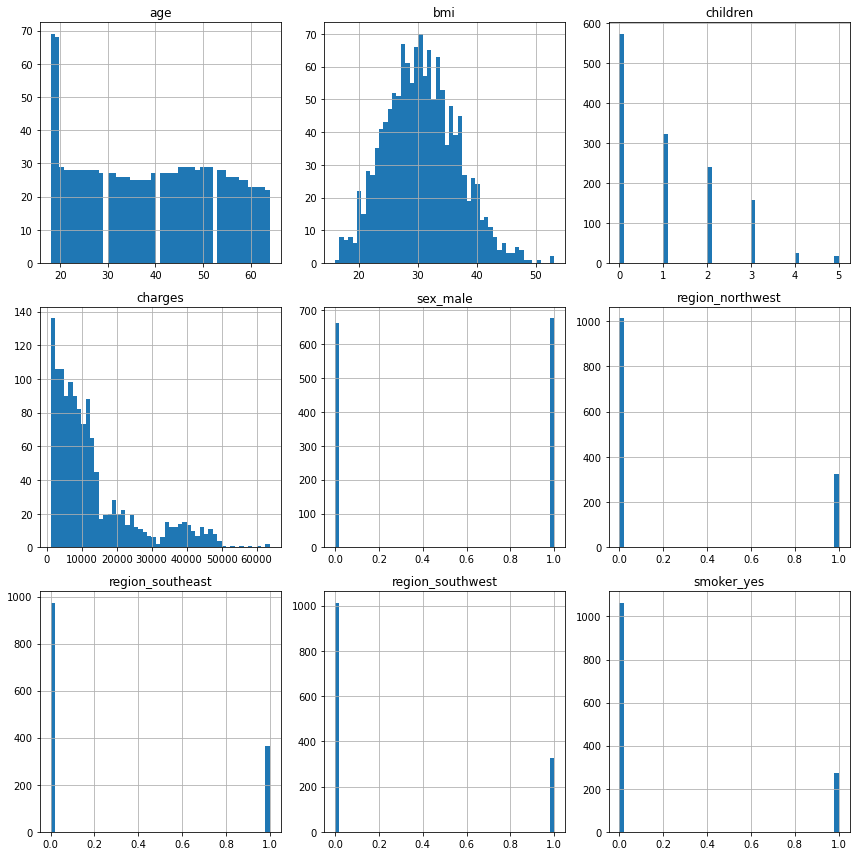

In [7]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [8]:
X=df.drop("charges",axis=1)
y=df["charges"]

#get feature and target variable

#### Train test split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#get training and testing data

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Parameter description</h2>
</div>

- loss_function : eval metric used for training
- iterations : max number of tree  that can be build.
- learning_rate : used for reducing the gradient setp
- depth : the depth of the tree 
- n_jobs : The number of jobs to run in parallel and  -1 means using all processors.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Initialize Catboost</h2>
</div>

In [10]:
cb_cls = cb.CatBoostRegressor(silent=True) #silet=True can help to suppress the iteration logs
#initialize the cb regressor
cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict




#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.86
Test  mae Score : 2609.96
Test  mse Score : 20513284.62


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- We used silent = True, to avoid the iteration log.
- Here we got good r2 score 86%.
- But the mae and mse score is huge, which is not good for model.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model building</h2>
</div>

#### iteration = 100
- Let's build 100 maximum number of tress.

In [11]:
cb_cls = cb.CatBoostRegressor(silent=True, iterations=100) #silet=True can help to suppress the iteration logs
#initialize the cb regressor
cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict




#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.86
Test  mae Score : 2615.76
Test  mse Score : 20923742.63


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- Nothing such changes occured in scores, but mse score decreased.

#### iteration = 300
- Let's build 300 iterations, which is number of maximum tree

In [12]:
cb_cls = cb.CatBoostRegressor(silent=True, iterations=300) #silet=True can help to suppress the iteration logs

cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict




#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.86
Test  mae Score : 2614.51
Test  mse Score : 20896374.75


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- No change in the scores.

#### max_depth = 10
- Let's build a model with max depth as 10

In [13]:
cb_cls = cb.CatBoostRegressor(silent=True, max_depth=10) #silet=True can help to suppress the iteration logs

cb_cls.fit(x_train, y_train)
#fit


y_pred = cb_cls.predict(x_test)
#predict


#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.85
Test  mae Score : 2741.90
Test  mse Score : 22682669.31


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- R2 score decreased by 1% and mae, mse incresed

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hyperparameter Tuning</h2>
</div>

In [129]:
from sklearn.model_selection import GridSearchCV
#import grid searchcv for hypeparameter tuning

cb_clf = cb.CatBoostRegressor(silent=True)
params = {
         'iterations': [10,50,100,200],
         'depth': [4, 5, 6,8, 10],
         'loss_function': ['RMSE', 'MultiRMSE', 'MAE', 'Quantile'],
         'learning_rate' : [0.01,0.1],

       
        }
#define params 


grid_search = GridSearchCV(cb_clf, params, n_jobs=-1, cv = 3, verbose=1)

grid_search.fit(x_train, y_train)
#fit the params

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fadb2963978>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 8, 10],
                         'iterations': [10, 50, 100, 200],
                         'learning_rate': [0.01, 0.1],
                         'loss_function': ['RMSE', 'MultiRMSE', 'MAE',
                                           'Quantile']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [130]:
grid_search.best_params_
#let's see the best parameters as per our grid search

{'depth': 4, 'iterations': 50, 'learning_rate': 0.1, 'loss_function': 'RMSE'}

In [131]:
y_pred = grid_search.predict(x_test)

#evaluation metric
print("Test  R2 Score : %.2f"%r2_score(y_test, y_pred))
print("Test  mae Score : %.2f"%mean_absolute_error(y_test, y_pred))
print("Test  mse Score : %.2f"%mean_squared_error(y_test, y_pred))

Test  R2 Score : 0.88
Test  mae Score : 2470.11
Test  mse Score : 18128525.08


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

- After hyperparameter tuning  R2 score increased from 86% to 88% comparing with the catboost model we intialized first.
- mae and mse score also increased significantly.